In [1]:
import os
import numpy as np
import pandas as pd
from scipy import signal as sig
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
ddir = os.path.join('.','precipitation')
pr = xr.open_mfdataset(f'{ddir}/*.nc')
print(f'pr: {pr}')

pr: <xarray.Dataset>
Dimensions:  (time: 1428, lon: 144, lat: 72)
Coordinates:
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 ... 2019-12-01
  * lon      (lon) float32 -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(12, 72, 144), meta=np.ndarray>
Attributes: (12/23)
    CDI:                        Climate Data Interface version 1.9.10 (https:...
    source:                     Run ID = 2004151855. Data generated from:pre....
    institution:                KNMI Climate Explorer and Data held at Britis...
    Conventions:                CF-1.0
    title:                      CRU TS4.04 Precipitation  averaged over  5x 5...
    cdi:                        Climate Data Interface version 1.9.8 (https:/...
    ...                         ...
    geospatial_lon_resolution:  2.5
    climexp_url:                https://climexp.knmi

In [3]:
print(f'Dimensions: {pr.dims}')

Dimensions: Frozen({'time': 1428, 'lon': 144, 'lat': 72})


In [4]:
print(f'Attributes: {pr.attrs}')

Attributes: {'CDI': 'Climate Data Interface version 1.9.10 (https://mpimet.mpg.de/cdi)', 'source': 'Run ID = 2004151855. Data generated from:pre.2004011744.dtb', 'institution': 'KNMI Climate Explorer and Data held at British Atmospheric Data Centre, RAL, UK.', 'Conventions': 'CF-1.0', 'title': 'CRU TS4.04 Precipitation  averaged over  5x 5 grid boxes', 'cdi': 'Climate Data Interface version 1.9.8 (https://mpimet.mpg.de/cdi)', 'references': 'Information on the data is available at http://badc.nerc.ac.uk/data/cru/', 'comment': 'Access to these data is available to any registered CEDA user.', 'contact': 'support@ceda.ac.uk', 'cdo': 'Climate Data Operators version 1.9.8 (https://mpimet.mpg.de/cdo)', 'geospatial_lat_min': -90.0, 'geospatial_lat_max': 90.0, 'geospatial_lat_units': 'degrees_north', 'geospatial_lon_min': -180.0, 'geospatial_lon_max': 180.0, 'geospatial_lon_units': 'degrees_east', 'geospatial_lat_resolution': 2.5, 'geospatial_lon_resolution': 2.5, 'climexp_url': 'https://climex

In [5]:
pr_location = pr.sel(lat=31.25, lon=76.25)
print(f'pr_location: {pr_location}')

pr_location: <xarray.Dataset>
Dimensions:  (time: 1428)
Coordinates:
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 ... 2019-12-01
    lon      float32 76.25
    lat      float32 31.25
Data variables:
    pr       (time) float32 dask.array<chunksize=(12,), meta=np.ndarray>
Attributes: (12/23)
    CDI:                        Climate Data Interface version 1.9.10 (https:...
    source:                     Run ID = 2004151855. Data generated from:pre....
    institution:                KNMI Climate Explorer and Data held at Britis...
    Conventions:                CF-1.0
    title:                      CRU TS4.04 Precipitation  averaged over  5x 5...
    cdi:                        Climate Data Interface version 1.9.8 (https:/...
    ...                         ...
    geospatial_lon_resolution:  2.5
    climexp_url:                https://climexp.knmi.nl/select.cgi?cru4_pre
    time_coverage_start:        1901-01-01 00:00:00
    time_coverage_end:          2019-12-01 00:00:00


# Output Seen

### The sel() method function helps us specify which datapoint for which we want to collect data for. In this case, we had specified latitude and longitude points, and extracted all the available time data for the specific location. This returned an output with a dimension containing time with 1428 data points, coordinates, data variables, and attributes. 

In [6]:
ddir = os.path.join('.','temperature')
tasmax = xr.open_mfdataset(f'{ddir}/*.nc')

In [7]:
tasmax_location = tasmax.sel(lat=31.25, lon=76.25)
tasmax_location.to_array()
tasmax_location = tasmax_location.rename({'tasmax':'temp'})

In [8]:
tasmax_location.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:  (time: 1428)
Coordinates:
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 ... 2019-12-01
    lon      float32 76.25
    lat      float32 31.25
Data variables:
    temp     (time) float32 dask.array<chunksize=(12,), meta=np.ndarray>
Attributes: (12/23)
    CDI:                        Climate Data Interface version 1.9.10 (https:...
    source:                     Run ID = 2004151855. Data generated from:TMX ...
    institution:                KNMI Climate Explorer and Data held at Britis...
    Conventions:                CF-1.0
    title:                      CRU TS4.04 Maximum Temperature  averaged over...
    cdi:                        Climate Data Interface version 1.9.8 (https:/...
    ...                         ...
    geospatial_lon_resolution:  2.5
    climexp_url:                https://climexp.knmi.nl/select.cgi?cru4_tmx
    time_coverage_start:        1901-01-01 00:00:00
    time_coverage_end:          2

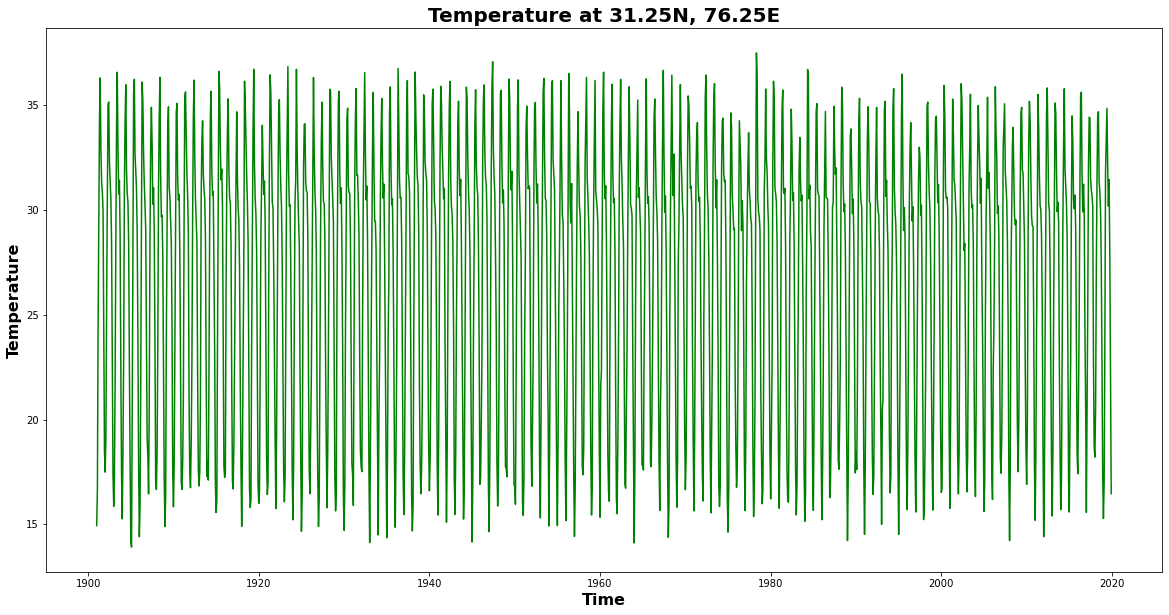

In [44]:
plt.close('all')
plt.figure(figsize=(20,10))
plt.plot(tasmax_location.time, tasmax_location.temp.values,'g')
plt.title('Temperature at 31.25N, 76.25E', fontsize=20, fontweight='bold')
plt.xlabel('Time', fontsize=16, fontweight='bold')
plt.ylabel('Temperature', fontsize=16, fontweight='bold')
plt.show()

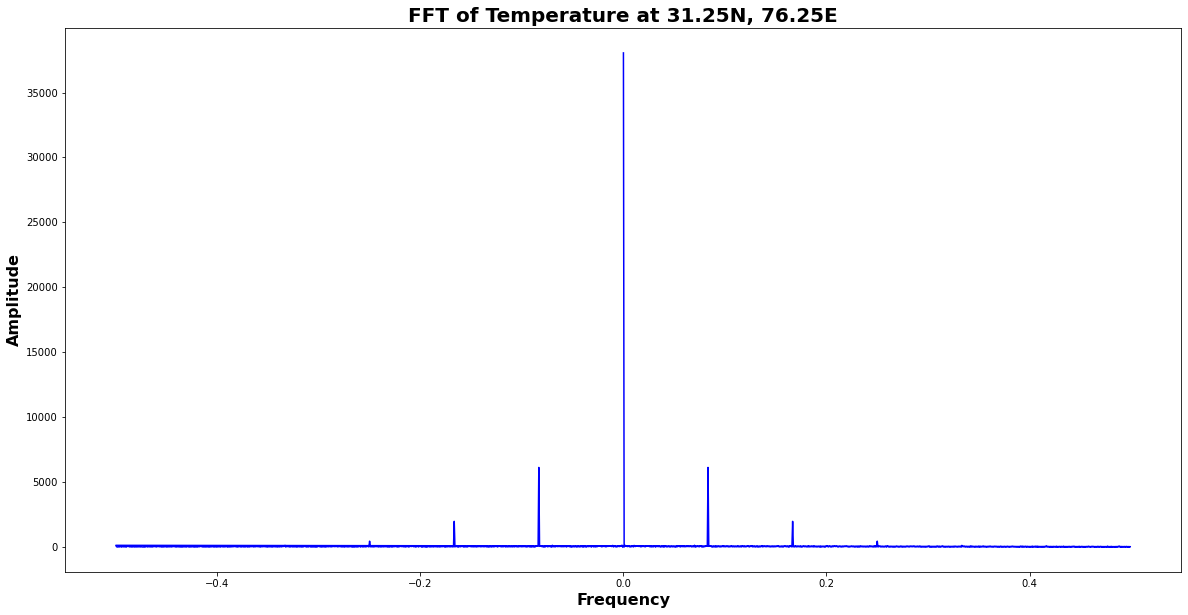

In [43]:
tmp_fft = np.fft.fft(tasmax_location.temp.values)
freq = np.fft.fftfreq(tasmax_location.temp.values.shape[0], d=1)
plt.close('all')
plt.figure(figsize=(20,10))
plt.plot(freq, np.abs(tmp_fft), 'b')
plt.title('FFT of Temperature at 31.25N, 76.25E', fontsize=20, fontweight='bold')
plt.xlabel('Frequency', fontsize=16, fontweight='bold')
plt.ylabel('Amplitude', fontsize=16, fontweight='bold')
plt.show()

# What the Peaks Mean

### The peaks in the plot represent the frequency components that make up the time series. They correspond to particular frequencies that contribute to the overall shape of the time series. The heights of the peaks indicate the amplitudes of the frequency components. 

# Why they are multiples of each other

### This is because periodicity occur due to seasonal cycles, as seen in the plot. The algorithm assumes that the time series is periodic with a fixed period, and it is computing the frequency components that make up that periodic function. The spacing between the peaks is equal to the inverse of the period of the time series (1/12).

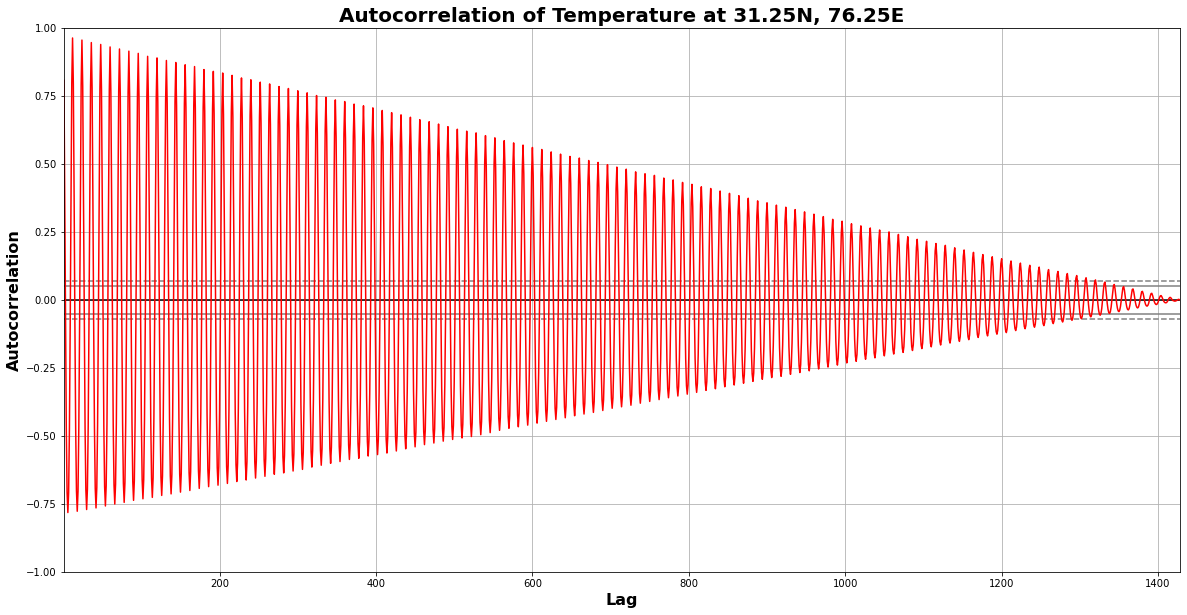

In [45]:
plt.close('all')
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(tasmax_location.temp.values, color='r')
plt.title('Autocorrelation of Temperature at 31.25N, 76.25E', fontsize=20, fontweight='bold')
plt.xlabel('Lag', fontsize=16, fontweight='bold')
plt.ylabel('Autocorrelation', fontsize=16, fontweight='bold')
plt.show()

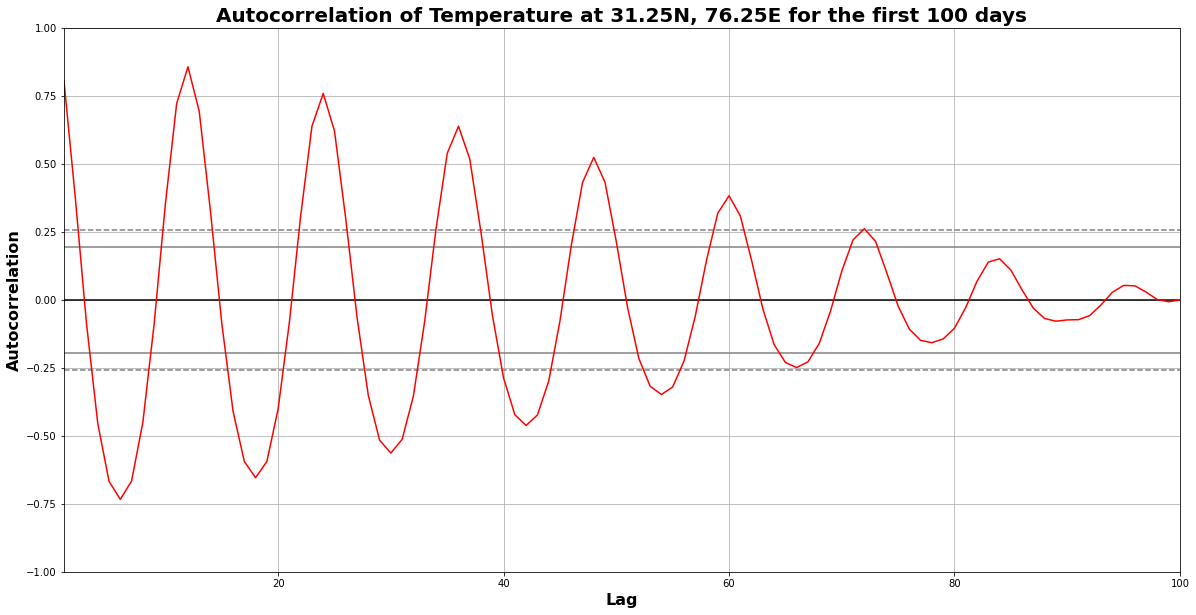

In [47]:
# zooming into the first 100 days
plt.close('all')
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(tasmax_location.temp.values[:100], color='r')
plt.title('Autocorrelation of Temperature at 31.25N, 76.25E for the first 100 days', fontsize=20, fontweight='bold')
plt.xlabel('Lag', fontsize=16, fontweight='bold')
plt.ylabel('Autocorrelation', fontsize=16, fontweight='bold')
plt.show()

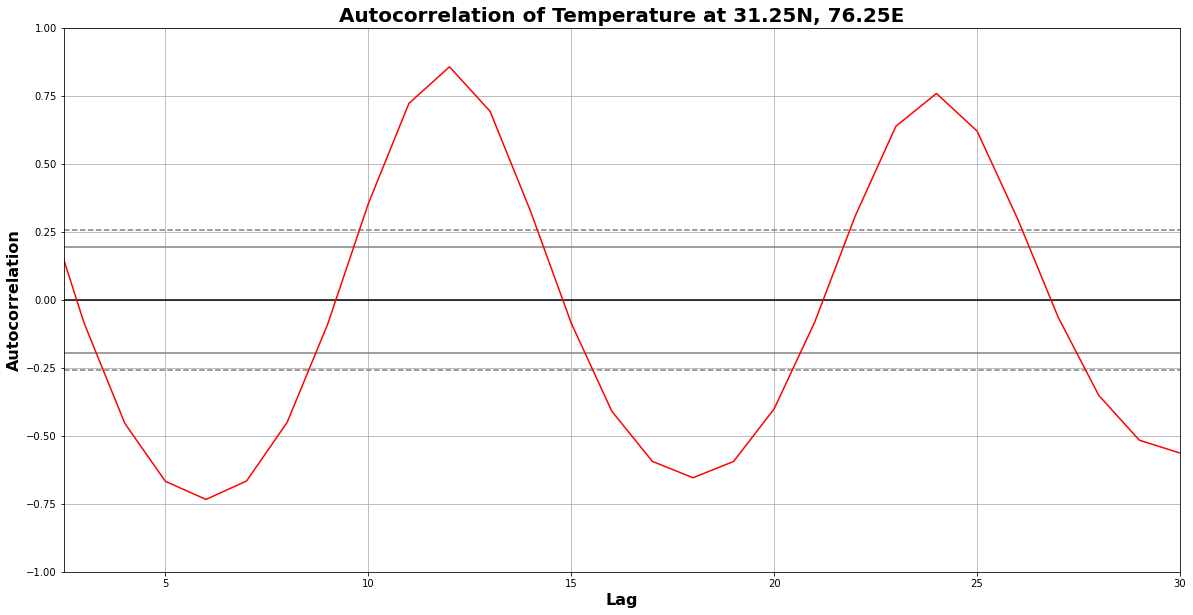

In [48]:
# getting the period of the first peak
plt.close('all')
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(tasmax_location.temp.values[:100], color='r')
plt.xlim(2.5,30)
plt.title('Autocorrelation of Temperature at 31.25N, 76.25E', fontsize=20, fontweight='bold')
plt.xlabel('Lag', fontsize=16, fontweight='bold')
plt.ylabel('Autocorrelation', fontsize=16, fontweight='bold')
plt.show()

# Period of the Data

### 12 (Number of Months in a Year as Expected)

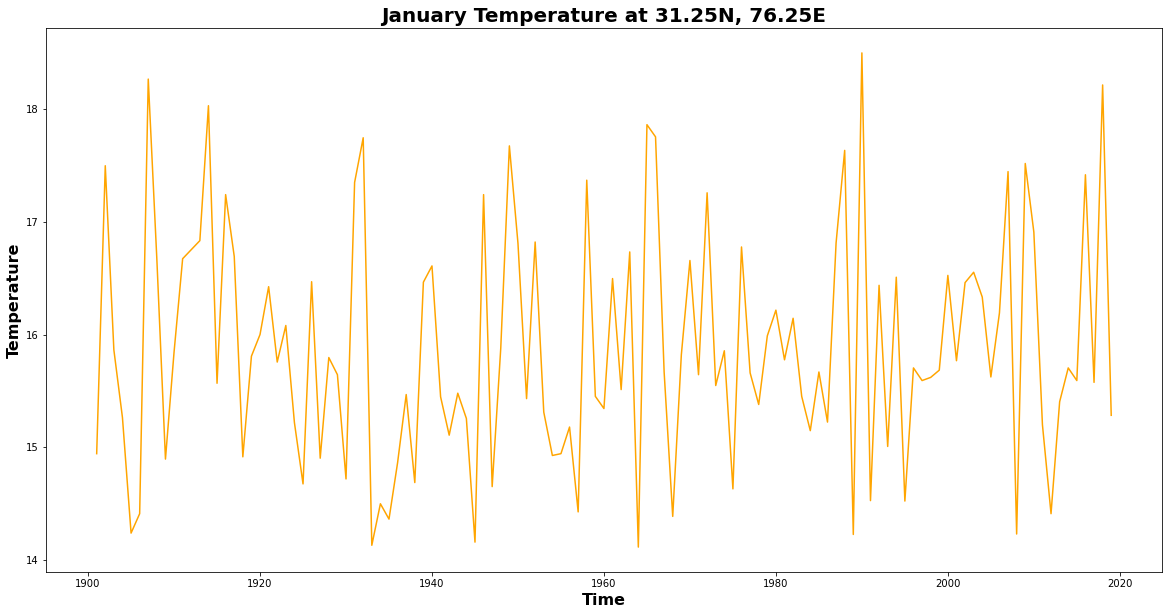

In [49]:
# plotting just january temperature for each year
january_data = tasmax_location.sel(time=tasmax_location.time.dt.month==1)
plt.close('all')
plt.figure(figsize=(20,10))
plt.plot(january_data.time, january_data.temp.values,'orange')
plt.title('January Temperature at 31.25N, 76.25E', fontsize=20, fontweight='bold')
plt.xlabel('Time', fontsize=16, fontweight='bold')
plt.ylabel('Temperature', fontsize=16, fontweight='bold')
plt.show()


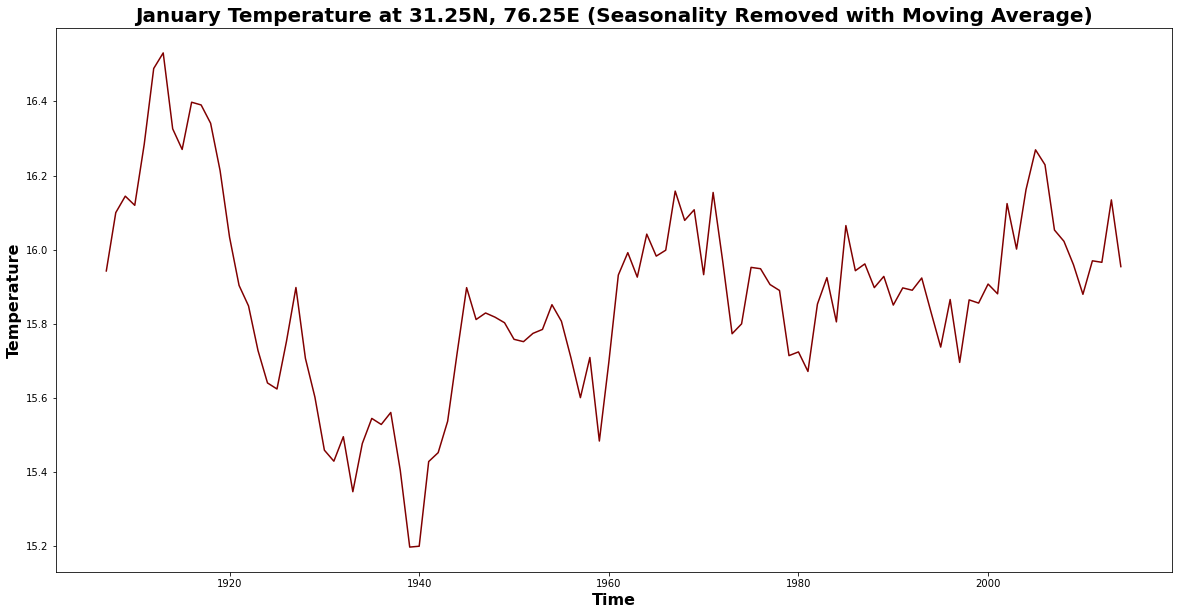

In [50]:
# getting rid of seasonality in the data
# Get the January data
january_data = tasmax_location.sel(time=tasmax_location.time.dt.month==1)

# Define the window size for the rolling average (in units of months)
window_size = 12

# Calculate the rolling average
rolling_avg = january_data.temp.rolling(time=window_size, center=True).mean()

# Plot the rolling average data
plt.close('all')
plt.figure(figsize=(20,10))
plt.plot(january_data.time, rolling_avg, 'maroon')
plt.title('January Temperature at 31.25N, 76.25E (Seasonality Removed with Moving Average)', fontsize=20, fontweight='bold')
plt.xlabel('Time', fontsize=16, fontweight='bold')
plt.ylabel('Temperature', fontsize=16, fontweight='bold')
plt.show()

# Results as seen in the plot

### Around 1916 - 1918, the temperature was the highest and it gradually decreased until it reached its lowest point in 1940. After 1940, temperature has been on a general increasing trend (we can see this clearly if we try to fit a regression line) with minor flunctuations each year. It is getting increasingly hotter (Climate change is real).

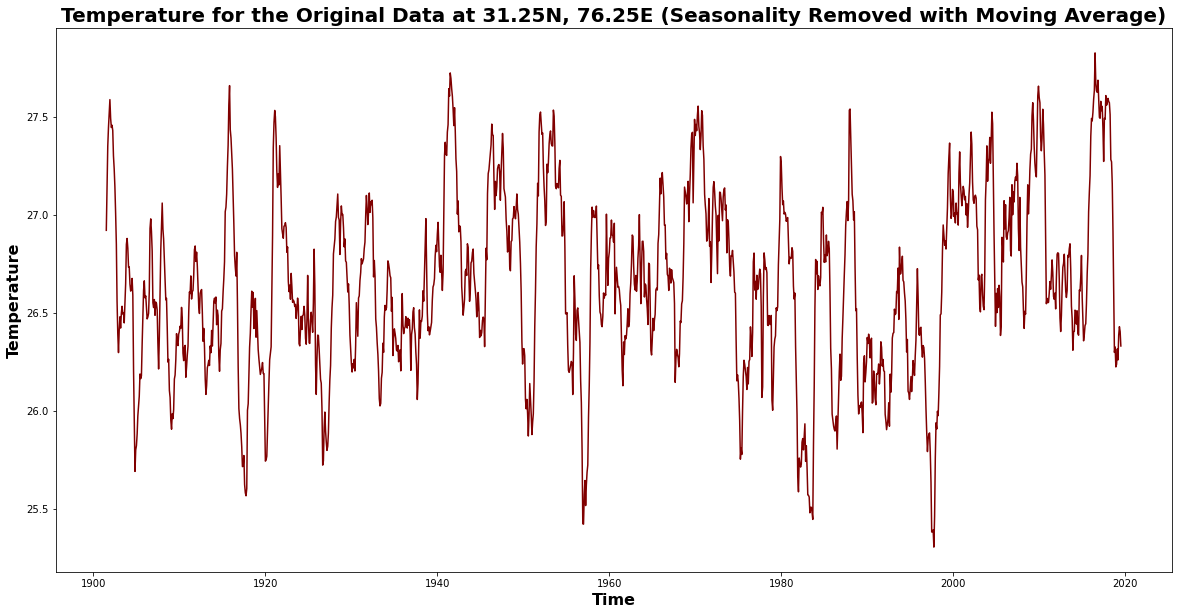

In [51]:
# for the original data
plt.close('all')
plt.figure(figsize=(20,10))
#tasmax_location.time
# tasmax_location.temp.values

window_size = 12
rolling_avg = tasmax_location.temp.rolling(time=window_size, center=True).mean()
plt.plot(tasmax_location.time, rolling_avg, 'maroon')
plt.title('Temperature for the Original Data at 31.25N, 76.25E (Seasonality Removed with Moving Average)', fontsize=20, fontweight='bold')
plt.xlabel('Time', fontsize=16, fontweight='bold')
plt.ylabel('Temperature', fontsize=16, fontweight='bold')
plt.show()

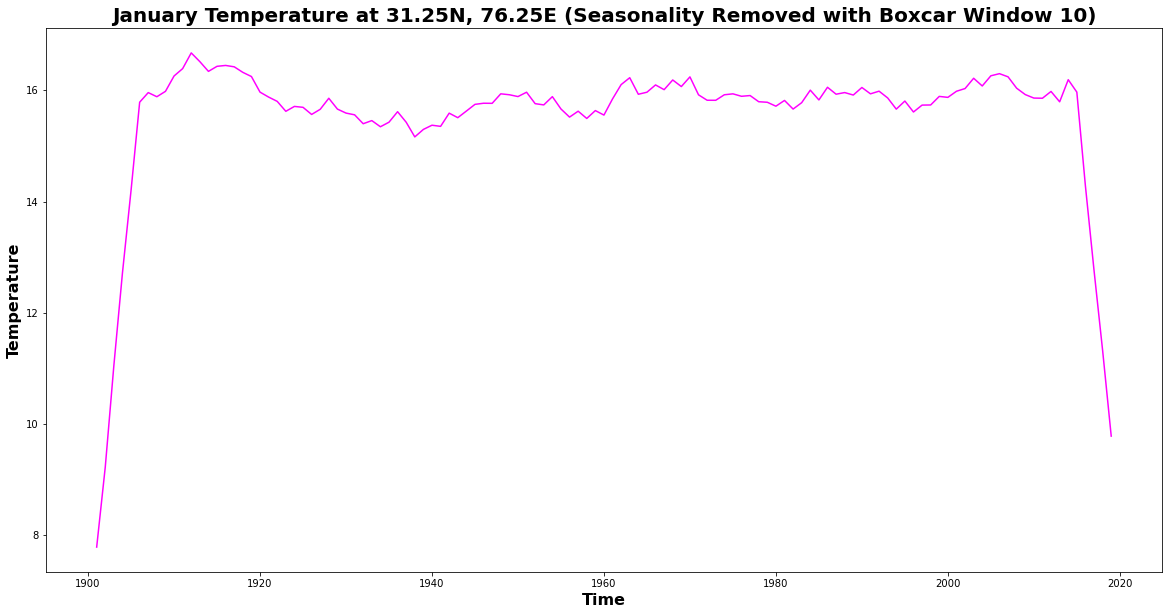

In [52]:
# Get the January data
january_data = tasmax_location.sel(time=tasmax_location.time.dt.month==1)

# Define the boxcar window size
window_size = 10

# Define the boxcar window function
boxcar = np.ones(window_size) / window_size

# Convolve the data with the boxcar window
smoothed_data = np.convolve(january_data.temp, boxcar, mode='same')

# Plot the smoothed data
plt.close('all')
plt.figure(figsize=(20,10))
plt.plot(january_data.time, smoothed_data, 'magenta')
plt.title(f'January Temperature at 31.25N, 76.25E (Seasonality Removed with Boxcar Window {window_size})', fontsize=20, fontweight='bold')
plt.xlabel('Time', fontsize=16, fontweight='bold')
plt.ylabel('Temperature', fontsize=16, fontweight='bold')
plt.show()

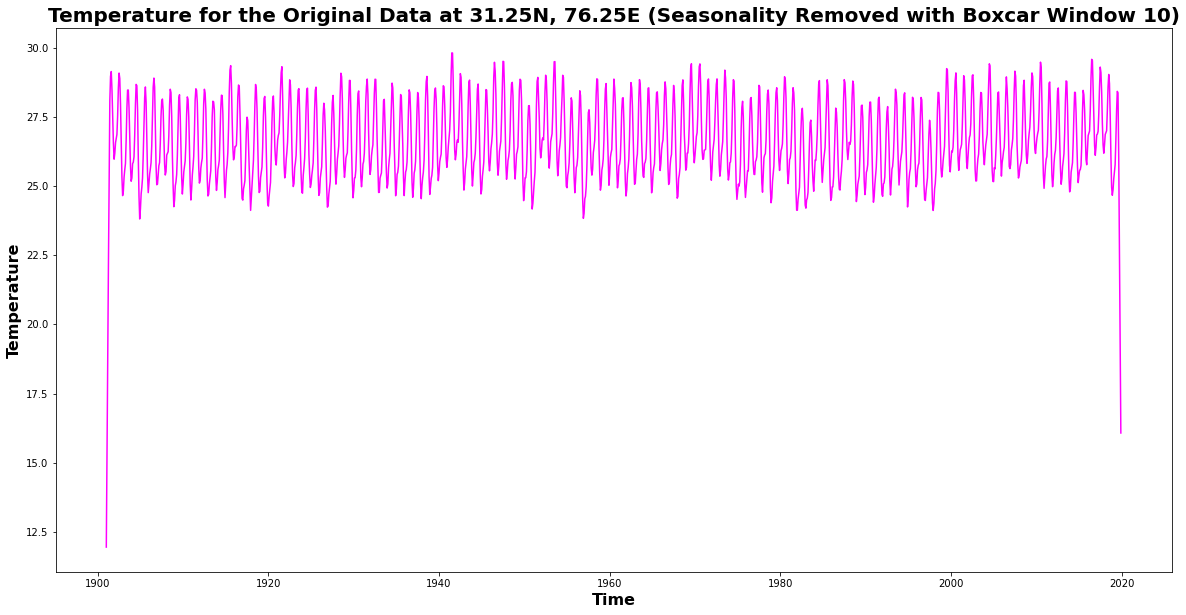

In [53]:
window_size = 10
boxcar = np.ones(window_size) / window_size
smoothed_data = np.convolve(tasmax_location.temp, boxcar, mode='same')
plt.close('all')
plt.figure(figsize=(20,10))
plt.plot(tasmax_location.time, smoothed_data, 'magenta')
plt.title(f'Temperature for the Original Data at 31.25N, 76.25E (Seasonality Removed with Boxcar Window {window_size})', fontsize=20, fontweight='bold')
plt.xlabel('Time', fontsize=16, fontweight='bold')
plt.ylabel('Temperature', fontsize=16, fontweight='bold')
plt.show()

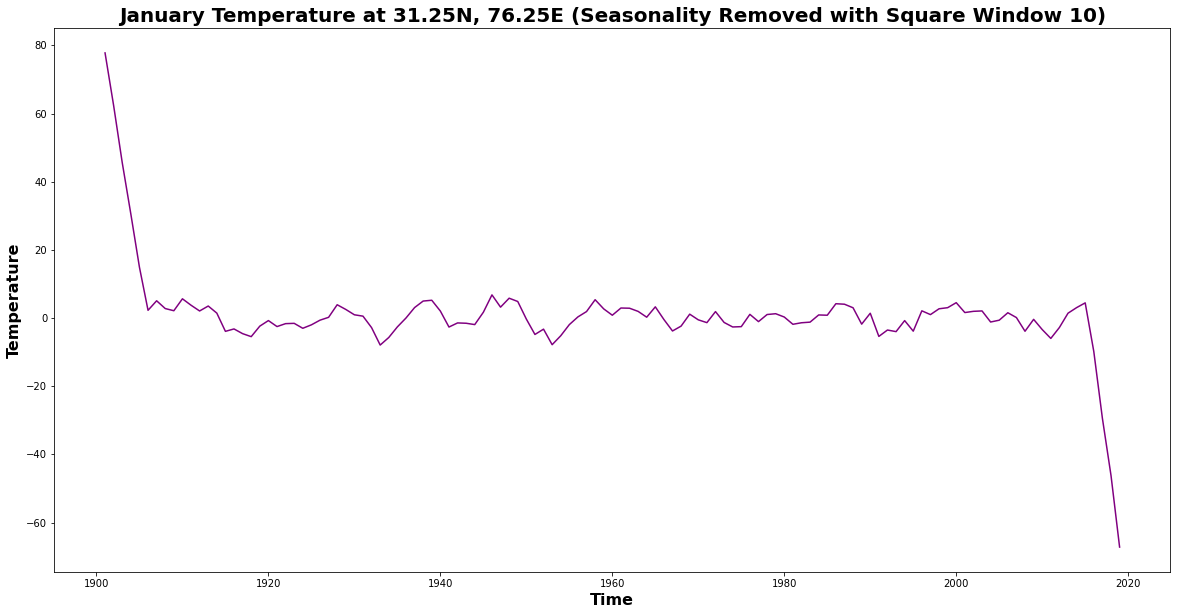

In [54]:
# Get the January data
january_data = tasmax_location.sel(time=tasmax_location.time.dt.month==1)

# Define the square window size
window_size = 10

# Define the square window function
square = np.zeros(window_size)
square[:window_size//2] = 1
square[window_size//2:] = -1

# Convolve the data with the square window
smoothed_data = np.convolve(january_data.temp, square, mode='same')

# Plot the smoothed data
plt.close('all')
plt.figure(figsize=(20,10))
plt.plot(january_data.time, smoothed_data, 'purple')
plt.title(f'January Temperature at 31.25N, 76.25E (Seasonality Removed with Square Window {window_size})', fontsize=20, fontweight='bold')
plt.xlabel('Time', fontsize=16, fontweight='bold')
plt.ylabel('Temperature', fontsize=16, fontweight='bold')
plt.show()

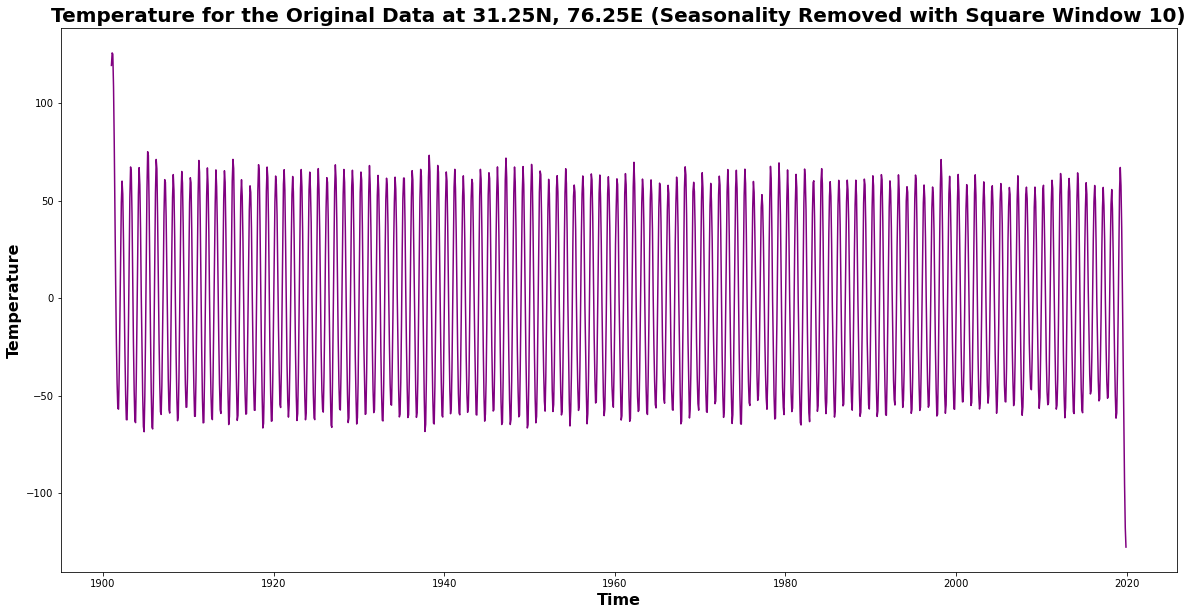

In [55]:
window_size = 10
square = np.zeros(window_size)
square[:window_size//2] = 1
square[window_size//2:] = -1
smoothed_data = np.convolve(tasmax_location.temp, square, mode='same')
plt.close('all')
plt.figure(figsize=(20,10))
plt.plot(tasmax_location.time, smoothed_data, 'purple')
plt.title(f'Temperature for the Original Data at 31.25N, 76.25E (Seasonality Removed with Square Window {window_size})', fontsize=20, fontweight='bold')
plt.xlabel('Time', fontsize=16, fontweight='bold')
plt.ylabel('Temperature', fontsize=16, fontweight='bold')
plt.show()

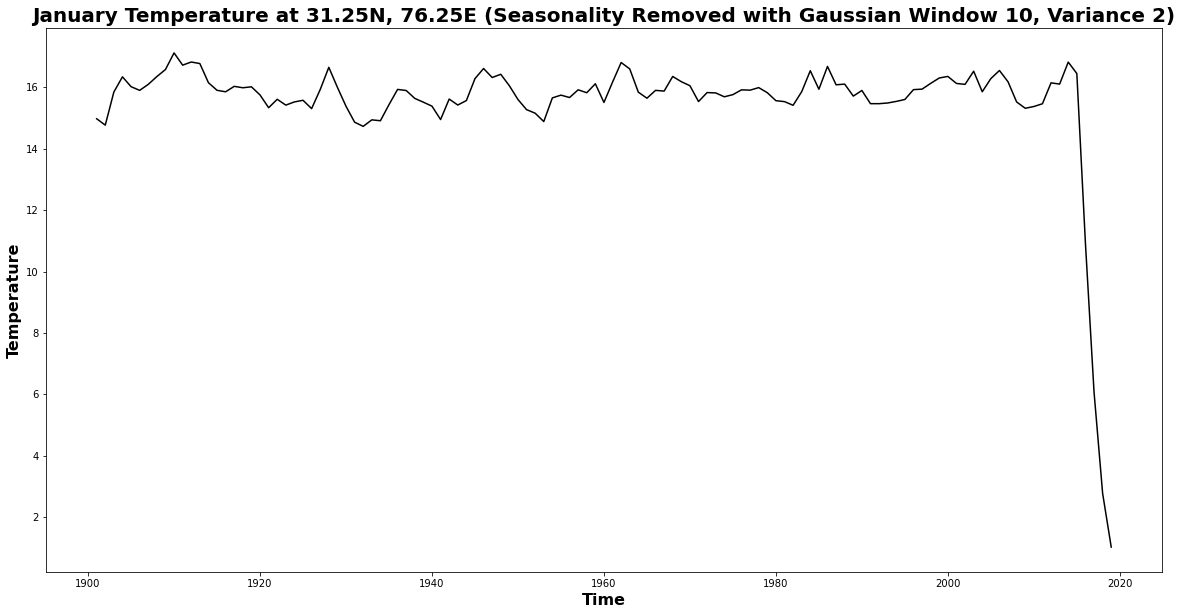

In [56]:
# Get the January data
january_data = tasmax_location.sel(time=tasmax_location.time.dt.month==1)

# Define the Gaussian window size and variance
window_size = 10
variance = 2

# Define the Gaussian window function
gaussian = np.exp(-np.arange(window_size)**2/(2*variance**2))

# Normalize the Gaussian window function
gaussian /= np.sum(gaussian)

# Convolve the data with the Gaussian window
smoothed_data = np.convolve(january_data.temp, gaussian, mode='same')

# Plot the smoothed data
plt.close('all')
plt.figure(figsize=(20,10))
plt.plot(january_data.time, smoothed_data, 'black')
plt.title(f'January Temperature at 31.25N, 76.25E (Seasonality Removed with Gaussian Window {window_size}, Variance {variance})', fontsize=20, fontweight='bold')
plt.xlabel('Time', fontsize=16, fontweight='bold')
plt.ylabel('Temperature', fontsize=16, fontweight='bold')
plt.show()

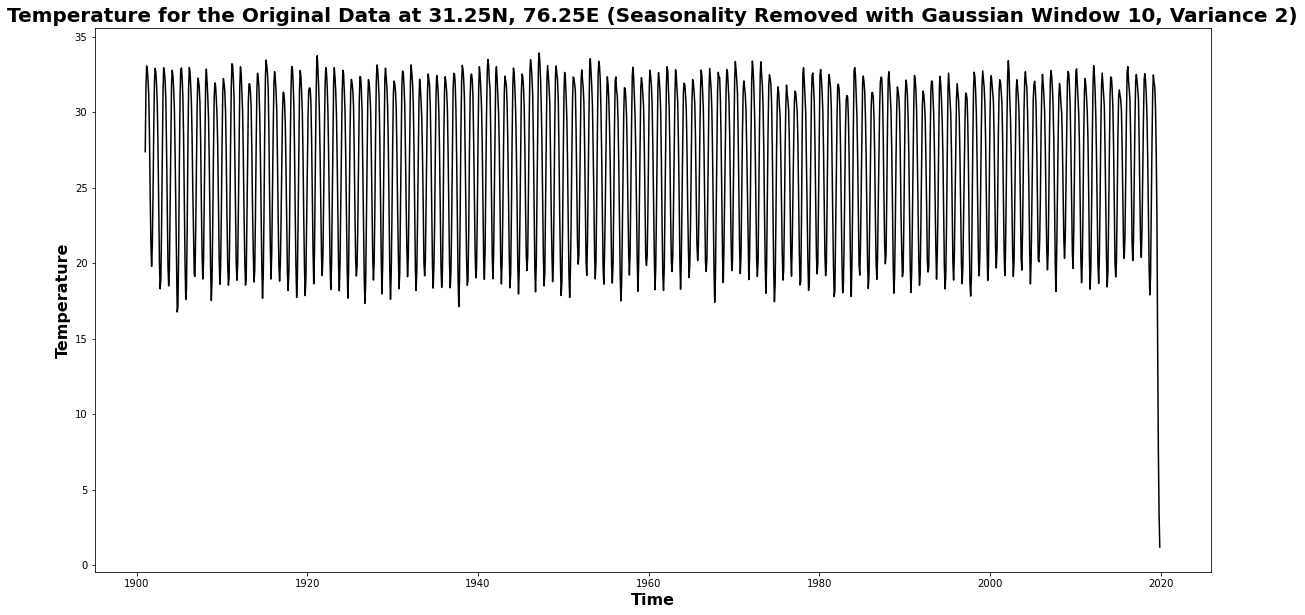

In [57]:
window_size = 10
variance = 2
gaussian = np.exp(-np.arange(window_size)**2/(2*variance**2))
gaussian /= np.sum(gaussian)
smoothed_data = np.convolve(tasmax_location.temp, gaussian, mode='same')
plt.close('all')
plt.figure(figsize=(20,10))
plt.plot(tasmax_location.time, smoothed_data, 'black')
plt.title(f'Temperature for the Original Data at 31.25N, 76.25E (Seasonality Removed with Gaussian Window {window_size}, Variance {variance})', fontsize=20, fontweight='bold')
plt.xlabel('Time', fontsize=16, fontweight='bold')
plt.ylabel('Temperature', fontsize=16, fontweight='bold')
plt.show()

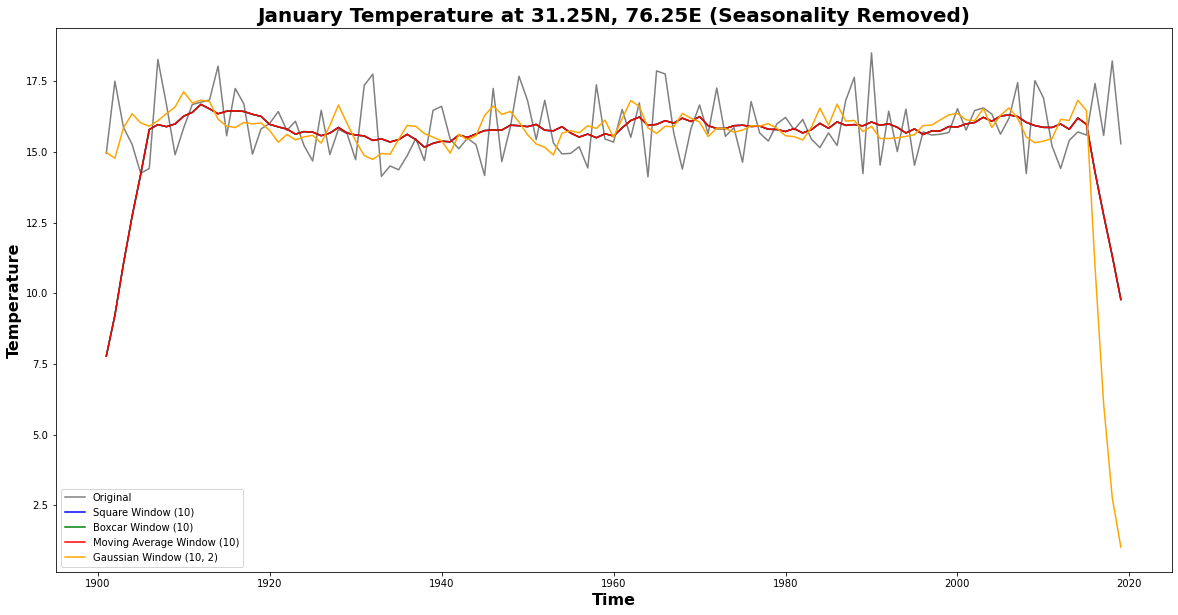

In [58]:
# Get the January data
january_data = tasmax_location.sel(time=tasmax_location.time.dt.month==1)

# Define the square window size
square_size = 10

# Define the moving average window size
ma_size = 10

# define the boxcar window function
window_size = 10
boxcar = np.ones(window_size) / window_size

# Define the Gaussian window size and variance
gaussian_size = 10
gaussian_variance = 2

# Define the square window function
square = np.ones(square_size)/square_size

# Define the moving average window function
ma = np.ones(ma_size)/ma_size

# Define the Gaussian window function
gaussian = np.exp(-np.arange(gaussian_size)**2/(2*gaussian_variance**2))
gaussian /= np.sum(gaussian)

# Convolve the data with the window functions
square_smoothed = np.convolve(january_data.temp, square, mode='same')
ma_smoothed = np.convolve(january_data.temp, ma, mode='same')
boxcar_smoothed = np.convolve(january_data.temp, boxcar, mode='same')
gaussian_smoothed = np.convolve(january_data.temp, gaussian, mode='same')

# Plot the smoothed data
plt.close('all')
plt.figure(figsize=(20,10))
plt.plot(january_data.time, january_data.temp, 'k', alpha=0.5, label='Original')
plt.plot(january_data.time, square_smoothed, 'b', label=f'Square Window ({square_size})')
plt.plot(january_data.time, boxcar_smoothed, 'g', label=f'Boxcar Window ({window_size})')
plt.plot(january_data.time, ma_smoothed, 'r', label=f'Moving Average Window ({ma_size})')
plt.plot(january_data.time, gaussian_smoothed, 'orange', label=f'Gaussian Window ({gaussian_size}, {gaussian_variance})')
plt.title('January Temperature at 31.25N, 76.25E (Seasonality Removed)', fontsize=20, fontweight='bold')
plt.xlabel('Time', fontsize=16, fontweight='bold')
plt.ylabel('Temperature', fontsize=16, fontweight='bold')
plt.legend()
plt.show()

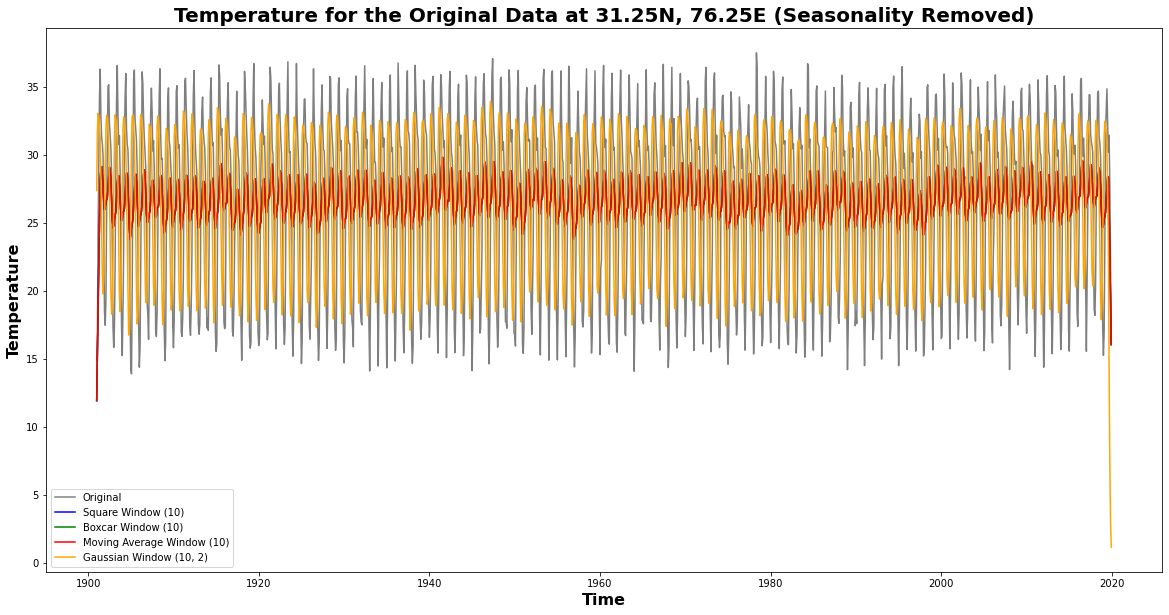

In [59]:
square_size = 10
ma_size = 10
window_size = 10
boxcar = np.ones(window_size) / window_size
gaussian_size = 10
gaussian_variance = 2
square = np.ones(square_size)/square_size
ma = np.ones(ma_size)/ma_size
gaussian = np.exp(-np.arange(gaussian_size)**2/(2*gaussian_variance**2))
gaussian /= np.sum(gaussian)
square_smoothed = np.convolve(tasmax_location.temp, square, mode='same')
ma_smoothed = np.convolve(tasmax_location.temp, ma, mode='same')
boxcar_smoothed = np.convolve(tasmax_location.temp, boxcar, mode='same')
gaussian_smoothed = np.convolve(tasmax_location.temp, gaussian, mode='same')
plt.close('all')
plt.figure(figsize=(20,10))
plt.plot(tasmax_location.time, tasmax_location.temp, 'k', alpha=0.5, label='Original')
plt.plot(tasmax_location.time, square_smoothed, 'b', label=f'Square Window ({square_size})')
plt.plot(tasmax_location.time, boxcar_smoothed, 'g', label=f'Boxcar Window ({window_size})')
plt.plot(tasmax_location.time, ma_smoothed, 'r', label=f'Moving Average Window ({ma_size})')
plt.plot(tasmax_location.time, gaussian_smoothed, 'orange', label=f'Gaussian Window ({gaussian_size}, {gaussian_variance})')
plt.title('Temperature for the Original Data at 31.25N, 76.25E (Seasonality Removed)', fontsize=20, fontweight='bold')
plt.xlabel('Time', fontsize=16, fontweight='bold')
plt.ylabel('Temperature', fontsize=16, fontweight='bold')
plt.legend()
plt.show()

In [20]:
# fitting an arima model to the data

# importing the arima model

import statsmodels as sm

In [21]:
from statsmodels.tsa.arima.model import ARIMA

In [34]:
january_data_array = pd.Series(january_data.temp.values, index=january_data.time)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  119
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -172.910
Date:                Sat, 06 May 2023   AIC                            351.820
Time:                        17:37:19   BIC                            360.157
Sample:                    01-01-1901   HQIC                           355.205
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.8810      0.089    177.652      0.000      15.706      16.056
ar.L1         -0.1208      0.080     -1.503      0.133      -0.278       0.037
sigma2         1.0704      0.172      6.228      0.0

c:\Users\Alli Ajagbe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Alli Ajagbe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Alli Ajagbe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


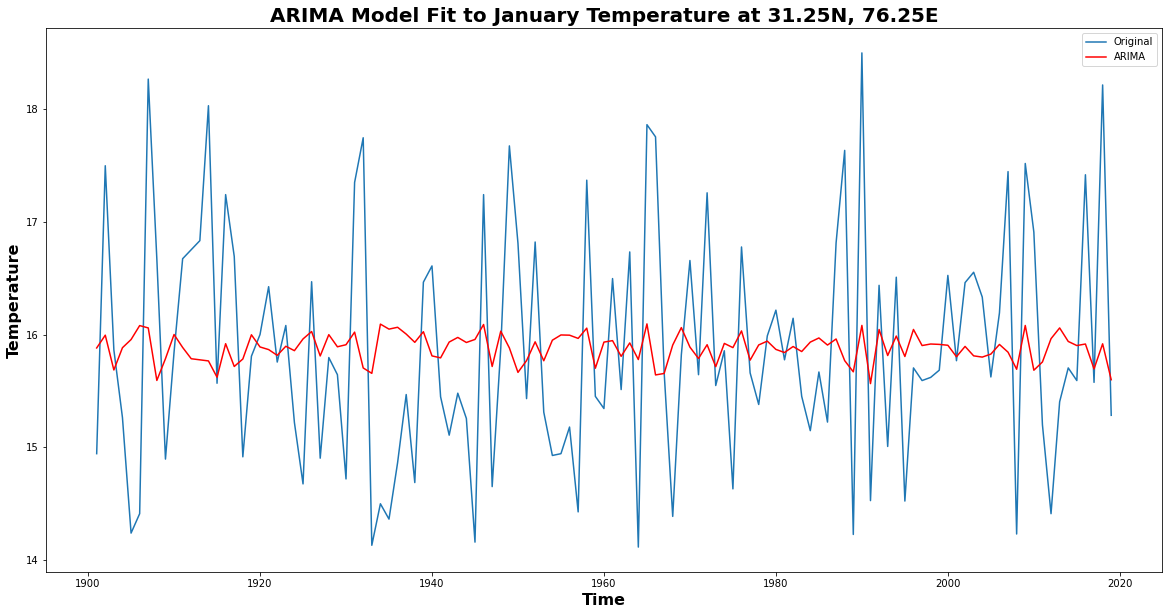

In [38]:
model = ARIMA(january_data_array, order=(1,0,0))

model_fit = model.fit()

print(model_fit.summary())

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(january_data_array, label='Original')
ax.plot(model_fit.fittedvalues, color='red', label='ARIMA')
ax.legend()
ax.set_title('ARIMA Model Fit to January Temperature at 31.25N, 76.25E', fontsize=20, fontweight='bold')
ax.set_xlabel('Time', fontsize=16, fontweight='bold')
ax.set_ylabel('Temperature', fontsize=16, fontweight='bold')
plt.show()

c:\Users\Alli Ajagbe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Alli Ajagbe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Alli Ajagbe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1428
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3938.212
Date:                Sat, 06 May 2023   AIC                           7882.423
Time:                        19:38:51   BIC                           7898.216
Sample:                    01-01-1901   HQIC                          7888.321
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.5813      0.565     47.007      0.000      25.473      27.690
ar.L1          0.8108      0.020     40.055      0.000       0.771       0.850
sigma2        14.5425      0.705     20.622      0.0

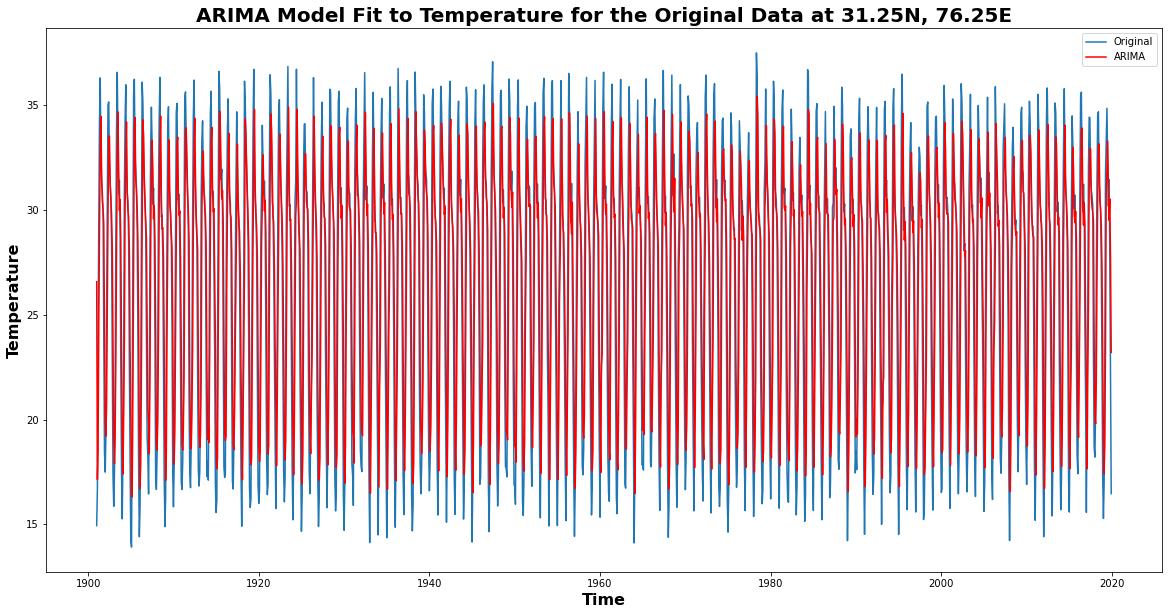

In [42]:
# for the original data
model = ARIMA(pd.Series(tasmax_location.temp, index=tasmax_location.time), order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(pd.Series(tasmax_location.temp, index=tasmax_location.time), label='Original')
ax.plot(model_fit.fittedvalues, color='red', label='ARIMA')
ax.legend()
ax.set_title('ARIMA Model Fit to Temperature for the Original Data at 31.25N, 76.25E', fontsize=20, fontweight='bold')
ax.set_xlabel('Time', fontsize=16, fontweight='bold')
ax.set_ylabel('Temperature', fontsize=16, fontweight='bold')
plt.show()